# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Importing statistical libraries for Python
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Importing prediction libraries for Python 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
) 

In [2]:
#Importing the dataset into the notebook
df = pd.read_csv('INNHotelsGroup.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
# Checking the first five and last five rows of data
df.head(-10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36260,INN36261,3,0,1,4,Meal Plan 1,1,Room_Type 4,178,2018,8,1,Online,0,0,0,137.25,1,Canceled
36261,INN36262,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
36262,INN36263,2,0,2,0,Not Selected,0,Room_Type 1,26,2018,8,7,Online,0,0,0,143.50,1,Not_Canceled
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled


In [4]:
# Shape of the data view
df.shape

(36275, 19)

The data set has 36275 rows and 19 columns

In [5]:
# Here is the DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- All columns have 36275 non-null values which is same as number of rows, hence there are no missing values.
- We have 5 columns with object types, 13 int64 types, and 1 float64 type.

In [6]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df.describe(include = ['object'])

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [9]:
# Checking for duplicate values
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

We don't have any duplicate values in our dataset

In [10]:
# Checking for null values

df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

We don't have any null values in our dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [11]:
# Let's create a function to label barplots

def custom_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # captures the length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # the % of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # plot width
        y = p.get_height()  # plot height

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the %

    plt.show()  

In [12]:
# Lets create a function to plot a boxplot and a histogram combined along the same scale.


def custom_histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# Creating a function to plot the category counts and plot a stacked bar chart

def custom_stacked_barplot(data, predictor, target, perc=False):
 
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### 1. Busiest months in the hotel

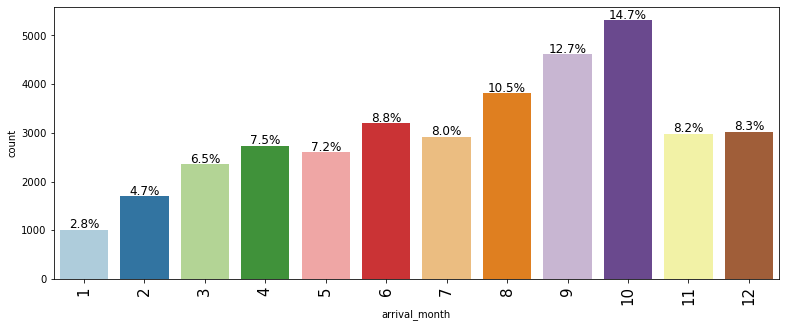

In [14]:
custom_barplot(df, 'arrival_month', perc=True, n=None)

From the barplot shown above, the busiest months of the year in the hotel seem to be between August and October. With October being the busiest month with 14.7% of the total bookings of the year.

### 2. The market segments that most guests come from

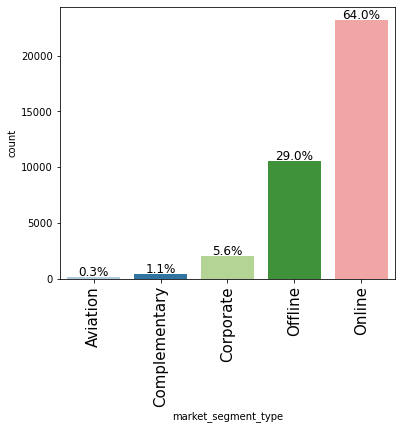

In [15]:
custom_barplot(df, 'market_segment_type', perc=True, n=None)

A large number of guests come from the online booking (internet) market segment type with a percentage of 64%.

### 3. The differences in room prices in different market segments

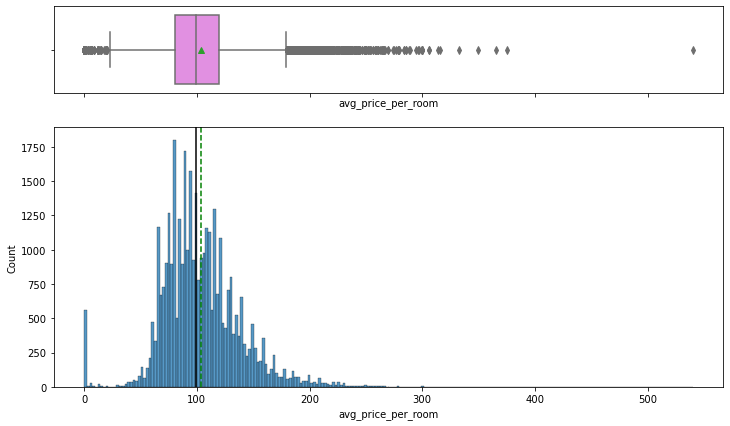

In [16]:
custom_histogram_boxplot(df, 'avg_price_per_room')

In [17]:
# The number of free rooms available
df[df['avg_price_per_room']==0] 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


In [18]:
df.loc[df['avg_price_per_room']==0, 'market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

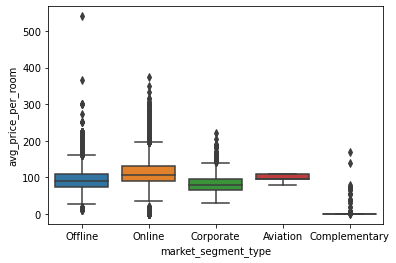

In [19]:
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room')

The online market segment has the highest room prices. Closely followed by the Offline market segment. The Corporate and Aviation, and complementary market segment follow behind.   

### 4. Percentage of cancelled booking

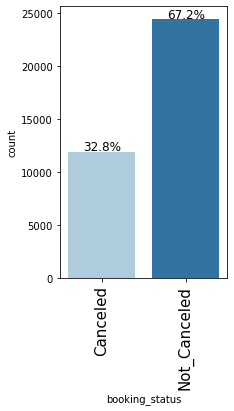

In [20]:
custom_barplot(df, 'booking_status', perc=True, n=None)

The percentage of cancelled booking is 32.8%. This percentage represents about a third of the total bookings of that year.

### 5. The percentage of repeating guests that cancel

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


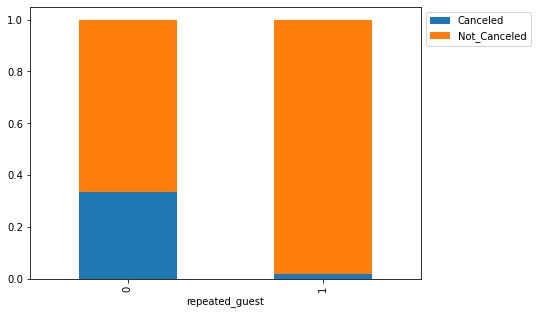

In [21]:
custom_stacked_barplot(df, 'repeated_guest', 'booking_status')

From the results, we can see that repeating guests rarely cancel their bookings. Only 16 repeating guests canceled their bookings from the total sample data. It is unlikely for a repeated guest to cancel booking. Most repeat guests appear satisfied with their stay in the hotel.

### 6. Do guest requirements affect booking cancellations

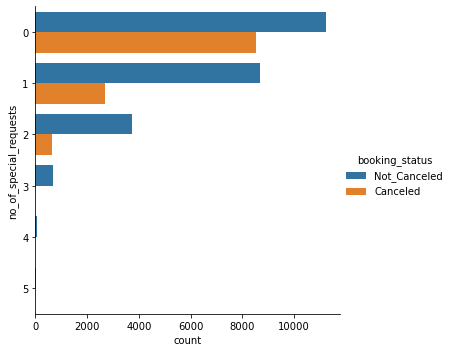

In [22]:
sns.catplot(data=df, y='no_of_special_requests', hue='booking_status', kind='count' )

From the above results, we can note that:
- The absence of special request increases the likelihood of cancellation. Many guests canceled bookings when the number of special request is zero.
- The likelihood of cancellation decreases with the addition of of 1 special request.
- The likelihood of cancellation decreases even further with the addition of 2 special requests.
- The likelihood of cancellation is eliminated with the addition of a third special request.

## Univariate Analysis

### Number of adults

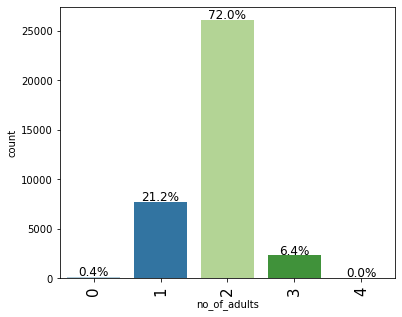

In [23]:
custom_barplot(df, 'no_of_adults', perc=True)

Insights: It appears that most adults book for two. It appears couples are the ideal booking candidates.   

### Number of children

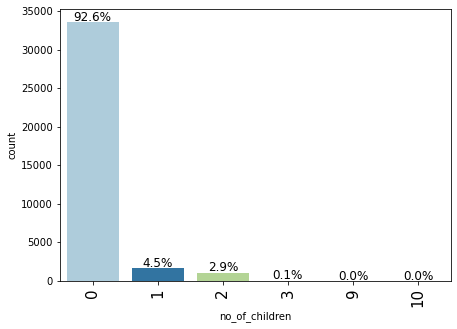

In [24]:
custom_barplot(df, 'no_of_children', perc=True)

Insight: It is unlikely that guests will come with children. With a 92.6% of bookings not including childen, the business shouldn't focus much on including children spaces in the rooms.

### Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

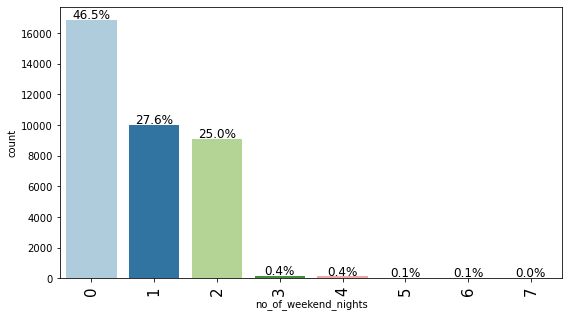

In [25]:
custom_barplot(df, 'no_of_weekend_nights', perc=True)

Insights: 46.5% of bookings include at least one weekend night. 

### Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

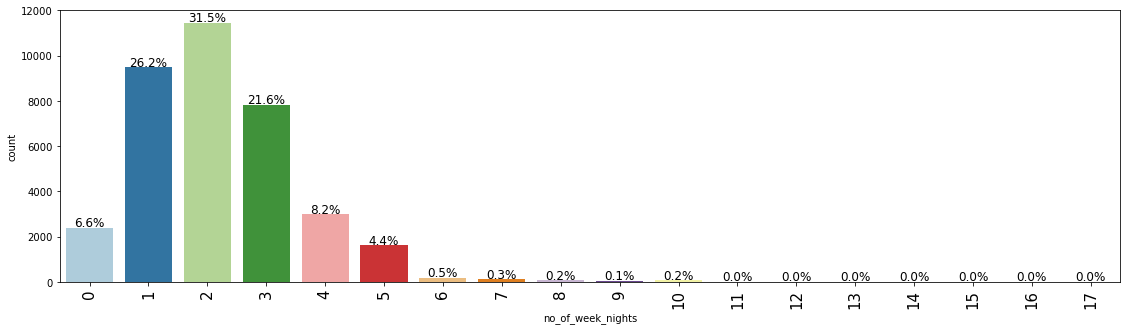

In [26]:
custom_barplot(df, 'no_of_week_nights', perc=True)

Insights: This results show that guests rarely stay for long at the hotel.

### Type of meal plan booked by the customer:

    Not Selected – No meal plan selected
    Meal Plan 1 – Breakfast
    Meal Plan 2 – Half board (breakfast and one other meal)
    Meal Plan 3 – Full board (breakfast, lunch, and dinner)

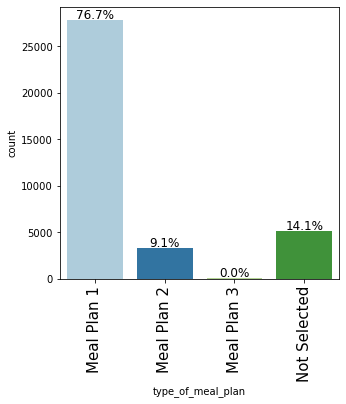

In [27]:
custom_barplot(df, 'type_of_meal_plan', perc=True)

Insight: The meal plan 1 (breakfast) is the most popular. The business should focus on advertising this plan.

### Required car  parking space

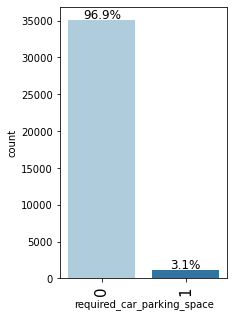

In [28]:
custom_barplot(df, 'required_car_parking_space', perc=True)

Insight: Parking doesn't contribute much. No need to put much time in promoting it.

### Room type reserved

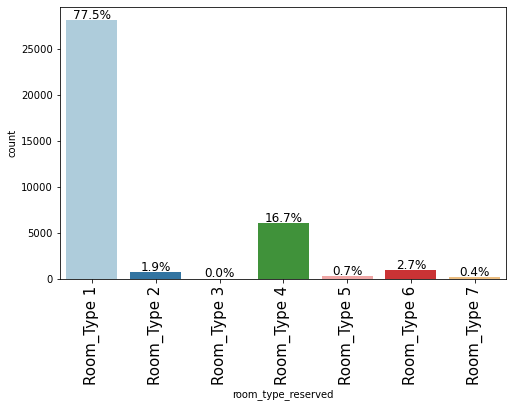

In [29]:
custom_barplot(df, 'room_type_reserved', perc=True)

Insights: Room type 1 and type 4 seem to be the most prefered for booking for most guests. The business should focus on setting up these types of rooms to maximize their revenues.

### Number of days between the date of booking and the arrival date

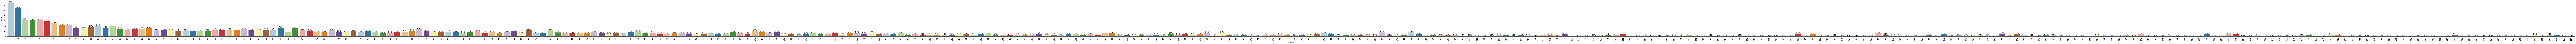

In [30]:
custom_barplot(df, 'lead_time', perc=True)

### Number of previous bookings that were canceled by the customer prior to the current booking

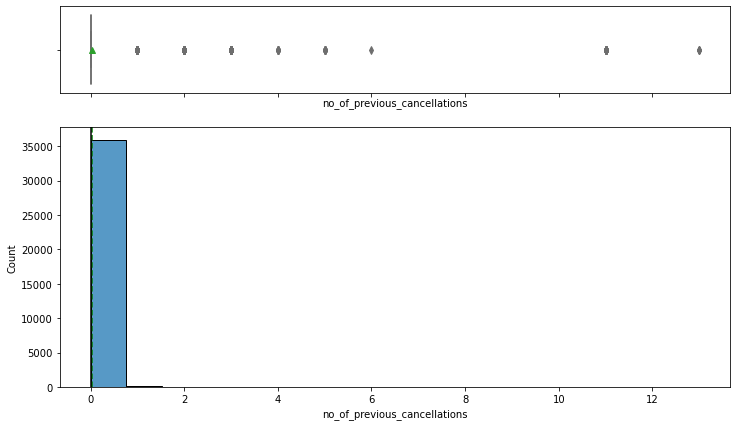

In [31]:
custom_histogram_boxplot(df, 'no_of_previous_cancellations')

### Number of previous bookings not canceled by the customer prior to the current booking

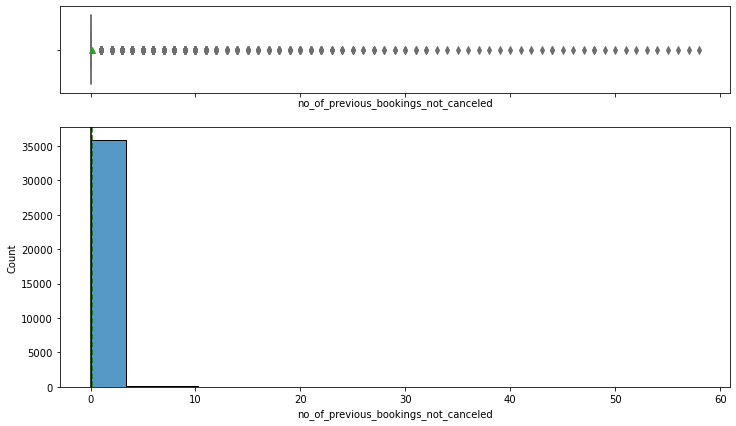

In [32]:
custom_histogram_boxplot(df, 'no_of_previous_bookings_not_canceled')

<AxesSubplot:>

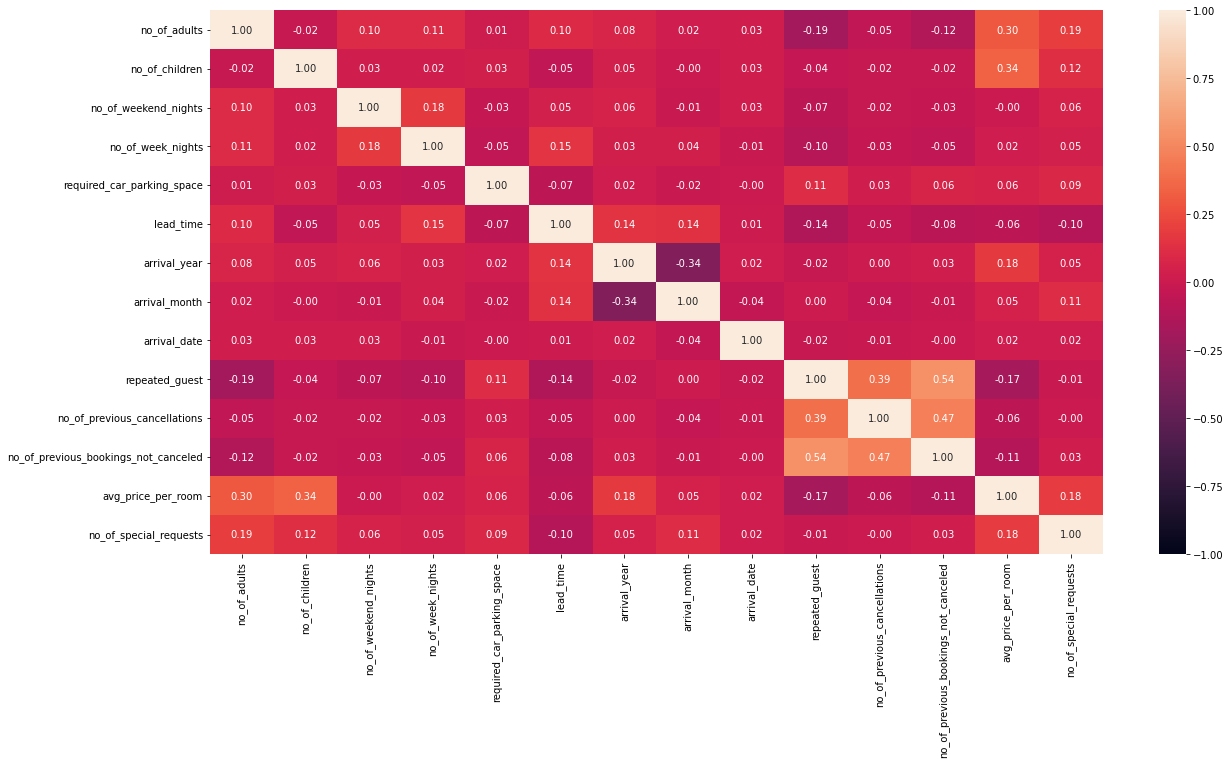

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(
df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

In [34]:
# Let's create a new column for the length of stay
df['length_of_stay'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

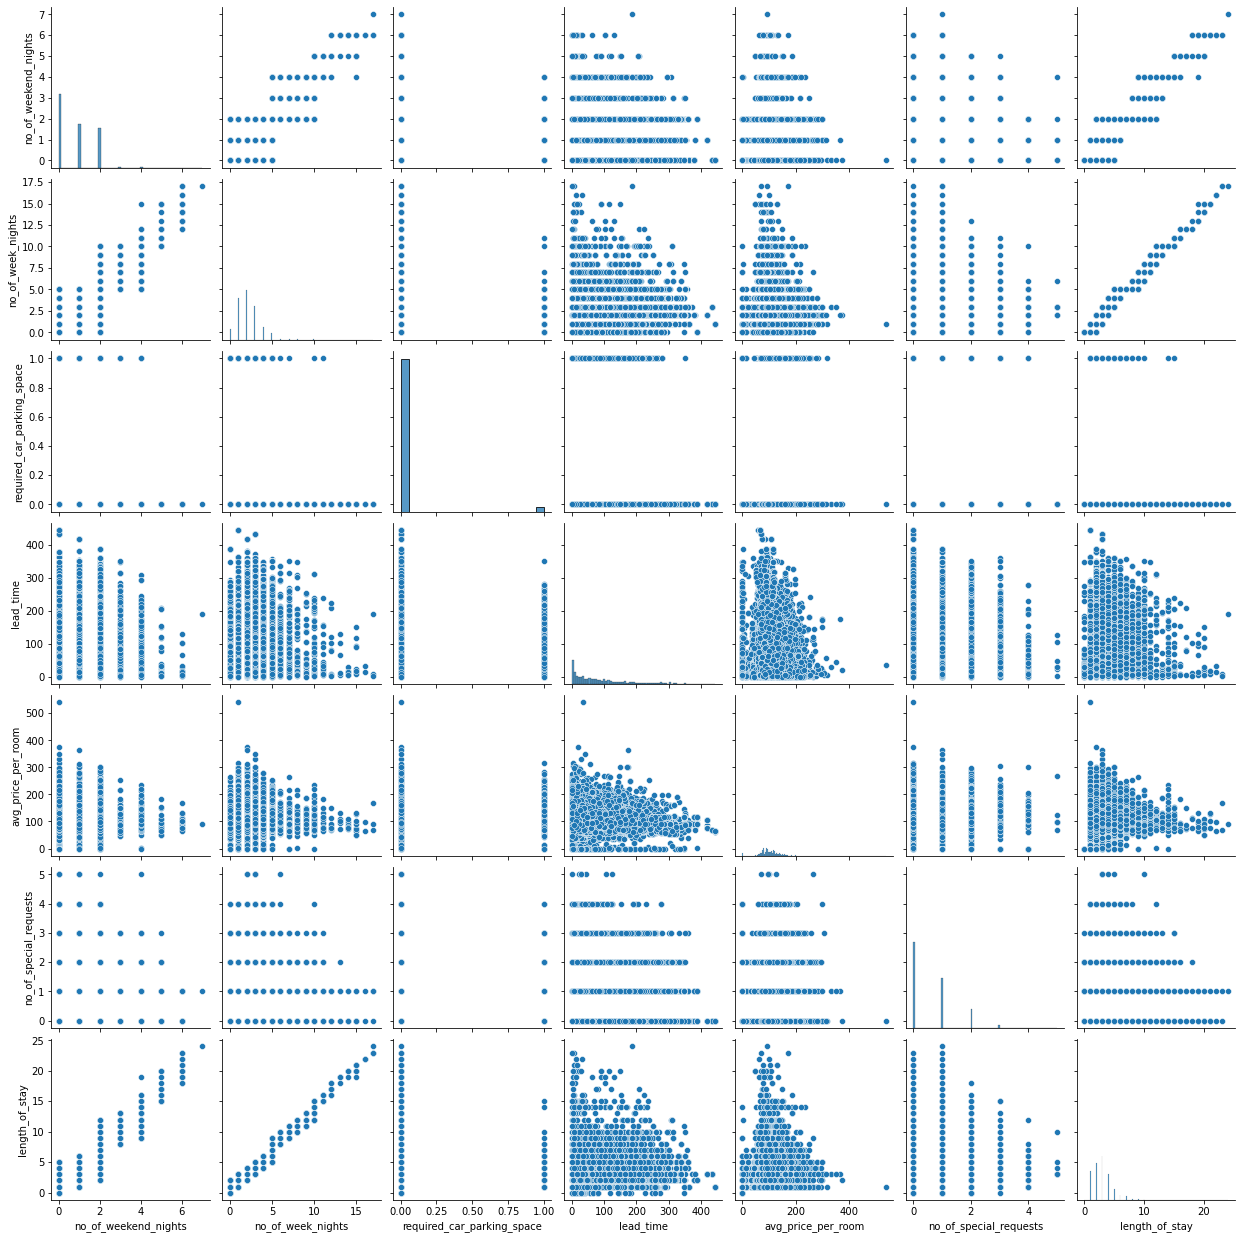

In [35]:
sns.pairplot(df[['no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
                   'lead_time','avg_price_per_room','no_of_special_requests','type_of_meal_plan',
                   'room_type_reserved','market_segment_type','booking_status','length_of_stay']]);

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

Note: There are no missing values.

In [36]:
df1 = df.copy()

In [37]:
df1.loc[df1['booking_status']=='Not_Canceled','booking_status'] = False
df1.loc[df1['booking_status']=='Canceled','booking_status'] = True

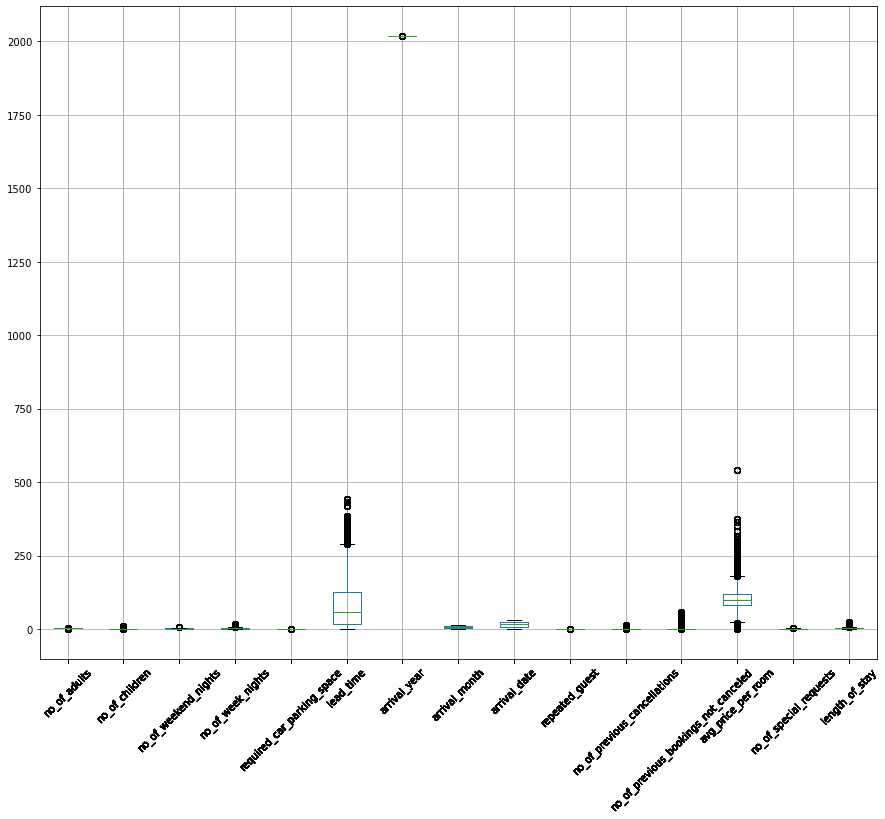

In [39]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
# Some columns aren't useful. So, we'll drop them
num_cols.remove("arrival_year")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    df1.boxplot() 

plt.xticks(rotation=45)
plt.show()

We have two outlier columns; the `lead_time` & `avg_room_price`. We will treat the `avg_room_price`  as a log. As for the `lead_time` we are going to bin it. That should handle those outliers.

In [40]:
#Solving the Interquartile Range for avg price room. The interquartile range is a measure of statistical dispersion, which is the spread of the data. 
quartiles = np.quantile(df1['avg_price_per_room'][df['avg_price_per_room'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_pwrs = df1.loc[np.abs(df1['avg_price_per_room'] - df['avg_price_per_room'].median()) > power_4iqr, 'avg_price_per_room']
outlier_pwrs.shape

Q1 = 80.3, Q3 = 120.0, 4*IQR = 158.8


(49,)

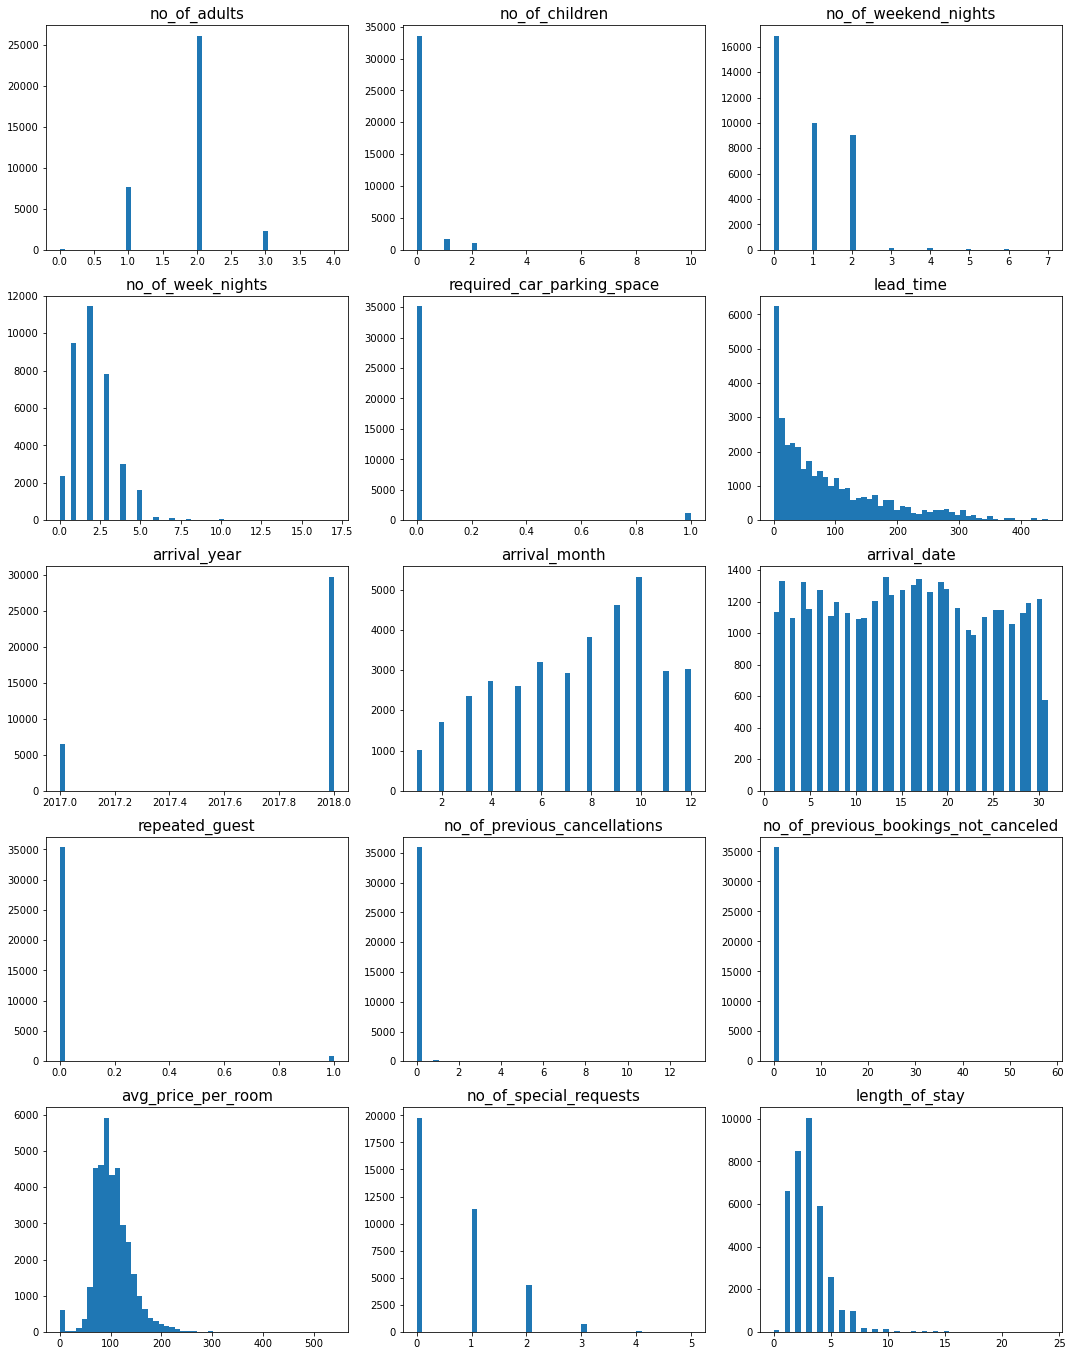

In [41]:
# let's create a list of columns
dist_cols = [
    item for item in df1.select_dtypes(include=np.number).columns 
]

plt.figure(figsize=(15, 45))
#let's loop throught the list and plot the histograms
for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=15)

plt.show()

In [42]:
# let's remove the following columns
dist_cols.remove('no_of_week_nights')
dist_cols.remove('no_of_adults')
dist_cols.remove('length_of_stay')
dist_cols.remove('avg_price_per_room')
dist_cols.remove('arrival_year')
dist_cols.remove('required_car_parking_space')
dist_cols.remove('arrival_date')
dist_cols.remove('arrival_month')
dist_cols.remove('repeated_guest')
dist_cols.remove('lead_time')

In [43]:
# let's use the log transforms on some columns
for col in dist_cols:
    df1[col + "_log"] = np.log(df1[col] + 1)

# dropping the original columns
df1.drop(dist_cols, axis=1, inplace=True)
df1.head()

,Booking_ID,no_of_adults,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,booking_status,length_of_stay,no_of_children_log,no_of_weekend_nights_log,no_of_previous_cancellations_log,no_of_previous_bookings_not_canceled_log,no_of_special_requests_log
0,INN00001,2,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,65.00,False,3,0.0,0.693147,0.0,0.0,0.000000
1,INN00002,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,106.68,False,5,0.0,1.098612,0.0,0.0,0.693147
2,INN00003,1,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,60.00,True,3,0.0,1.098612,0.0,0.0,0.000000
3,INN00004,2,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,100.00,True,2,0.0,0.000000,0.0,0.0,0.000000
4,INN00005,2,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,94.50,True,2,0.0,0.693147,0.0,0.0,0.000000


In [44]:
df1.shape

(36275, 20)

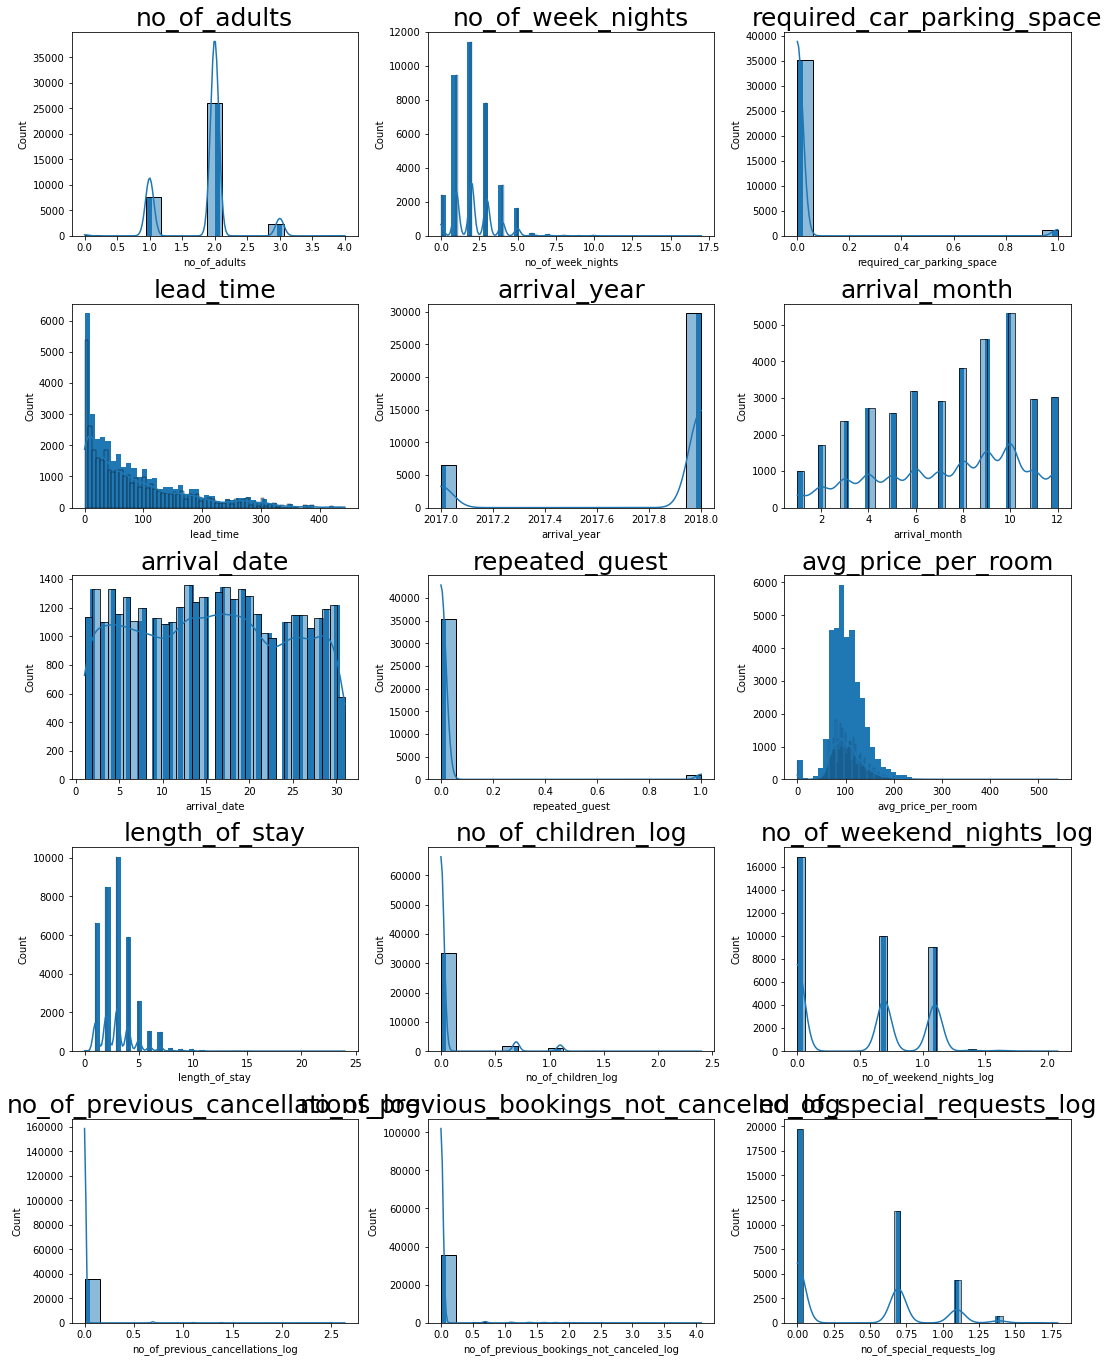

In [45]:
# let's visualize the distributions after the log transformation. 
dist_cols = [
    item for item in df1.select_dtypes(include=np.number).columns 
]

#  plot histogram of all numeric columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    sns.histplot(data=df1, x=dist_cols[i], kde=True)  
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

In [46]:
# Let's One-Hot Encode the categorical variables
dummy_data = pd.get_dummies (
    df1,
    columns = [
        'type_of_meal_plan',
        'room_type_reserved',
        'market_segment_type',
    ],
    drop_first=True,
)
dummy_data.head()

,Booking_ID,no_of_adults,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,2,0,224,2017,10,2,0,65.00,...,0,0,0,0,0,0,0,0,1,0
1,INN00002,2,3,0,5,2018,11,6,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,INN00003,1,1,0,1,2018,2,28,0,60.00,...,0,0,0,0,0,0,0,0,0,1
3,INN00004,2,2,0,211,2018,5,20,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,INN00005,2,1,0,48,2018,4,11,0,94.50,...,0,0,0,0,0,0,0,0,0,1


In [47]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Booking_ID                                36275 non-null  object 
 1   no_of_adults                              36275 non-null  int64  
 2   no_of_week_nights                         36275 non-null  int64  
 3   required_car_parking_space                36275 non-null  int64  
 4   lead_time                                 36275 non-null  int64  
 5   arrival_year                              36275 non-null  int64  
 6   arrival_month                             36275 non-null  int64  
 7   arrival_date                              36275 non-null  int64  
 8   repeated_guest                            36275 non-null  int64  
 9   avg_price_per_room                        36275 non-null  float64
 10  booking_status                    

In [48]:
dummied_cut = pd.cut(dummy_data['lead_time'], 5, labels=['lat_min','short','med','long','advanced'])
dummied_cut.head(20)

0         med
1     lat_min
2     lat_min
3         med
4     lat_min
5        long
6     lat_min
7     lat_min
8       short
9     lat_min
10    lat_min
11    lat_min
12    lat_min
13      short
14    lat_min
15        med
16    lat_min
17    lat_min
18      short
19    lat_min
Name: lead_time, dtype: category
Categories (5, object): ['lat_min' < 'short' < 'med' < 'long' < 'advanced']

In [49]:
df2 = pd.merge(dummy_data, dummied_cut, left_index=True, right_index=True)

df2.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_week_nights,2,3,1,2,1
required_car_parking_space,0,0,0,0,0
lead_time_x,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018
arrival_month,10,11,2,5,4
arrival_date,2,6,28,20,11
repeated_guest,0,0,0,0,0
avg_price_per_room,65.0,106.68,60.0,100.0,94.5


In [50]:
# We drop the time variables and lead_time_x since it has been binned into 5 columns.
df2_5 = df2.drop(['lead_time_x','arrival_date', 'arrival_year', 'Booking_ID'], axis=1)

In [51]:
df3 = pd.get_dummies (
    df2_5,
    columns = [
        'lead_time_y',  
    ],
    drop_first=True,
)
df3.head().T

,0,1,2,3,4
no_of_adults,2,2,1,2,2
no_of_week_nights,2,3,1,2,1
required_car_parking_space,0,0,0,0,0
arrival_month,10,11,2,5,4
repeated_guest,0,0,0,0,0
avg_price_per_room,65.0,106.68,60.0,100.0,94.5
booking_status,False,False,True,True,True
length_of_stay,3,5,3,2,2
no_of_children_log,0.0,0.0,0.0,0.0,0.0
no_of_weekend_nights_log,0.693147,1.098612,1.098612,0.0,0.693147


In [52]:
df3.dtypes

no_of_adults                                  int64
no_of_week_nights                             int64
required_car_parking_space                    int64
arrival_month                                 int64
repeated_guest                                int64
avg_price_per_room                          float64
booking_status                               object
length_of_stay                                int64
no_of_children_log                          float64
no_of_weekend_nights_log                    float64
no_of_previous_cancellations_log            float64
no_of_previous_bookings_not_canceled_log    float64
no_of_special_requests_log                  float64
type_of_meal_plan_Meal Plan 2                 uint8
type_of_meal_plan_Meal Plan 3                 uint8
type_of_meal_plan_Not Selected                uint8
room_type_reserved_Room_Type 2                uint8
room_type_reserved_Room_Type 3                uint8
room_type_reserved_Room_Type 4                uint8
room_type_re

In [53]:
df4 = df3.astype(float)

In [54]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              36275 non-null  float64
 1   no_of_week_nights                         36275 non-null  float64
 2   required_car_parking_space                36275 non-null  float64
 3   arrival_month                             36275 non-null  float64
 4   repeated_guest                            36275 non-null  float64
 5   avg_price_per_room                        36275 non-null  float64
 6   booking_status                            36275 non-null  float64
 7   length_of_stay                            36275 non-null  float64
 8   no_of_children_log                        36275 non-null  float64
 9   no_of_weekend_nights_log                  36275 non-null  float64
 10  no_of_previous_cancellations_log  

### Let's split the train test data in the ratio 70/30: Train 70% and Test 30%

In [ ]:
X = df4.drop("booking_status" , axis=1)
y = df4.pop("booking_status")

# adding a contstant to the X variable
X = add_constant(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [57]:
print("Number of rows present in train data =", X_train.shape[0])
print("Number of rows present in test data =", X_test.shape[0])

Number of rows present in train data = 25392
Number of rows present in test data = 10883


In [58]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0.0    0.670644
1.0    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0.0    0.676376
1.0    0.323624
Name: booking_status, dtype: float64


In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     25392 non-null  float64
 1   no_of_adults                              25392 non-null  float64
 2   no_of_week_nights                         25392 non-null  float64
 3   required_car_parking_space                25392 non-null  float64
 4   arrival_month                             25392 non-null  float64
 5   repeated_guest                            25392 non-null  float64
 6   avg_price_per_room                        25392 non-null  float64
 7   length_of_stay                            25392 non-null  float64
 8   no_of_children_log                        25392 non-null  float64
 9   no_of_weekend_nights_log                  25392 non-null  float64
 10  no_of_previous_cancellations_l

## EDA

- It is a good idea to explore the data once again after manipulating it.

<AxesSubplot:>

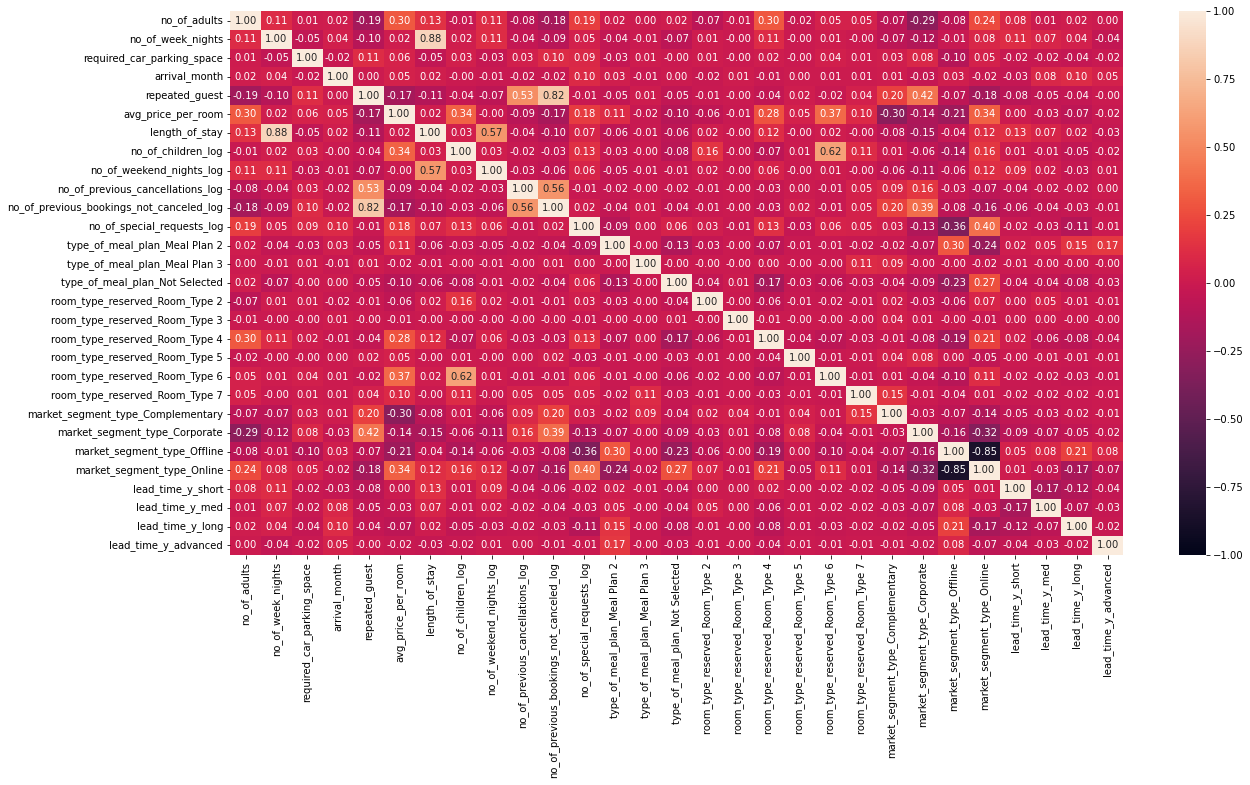

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(
df4.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

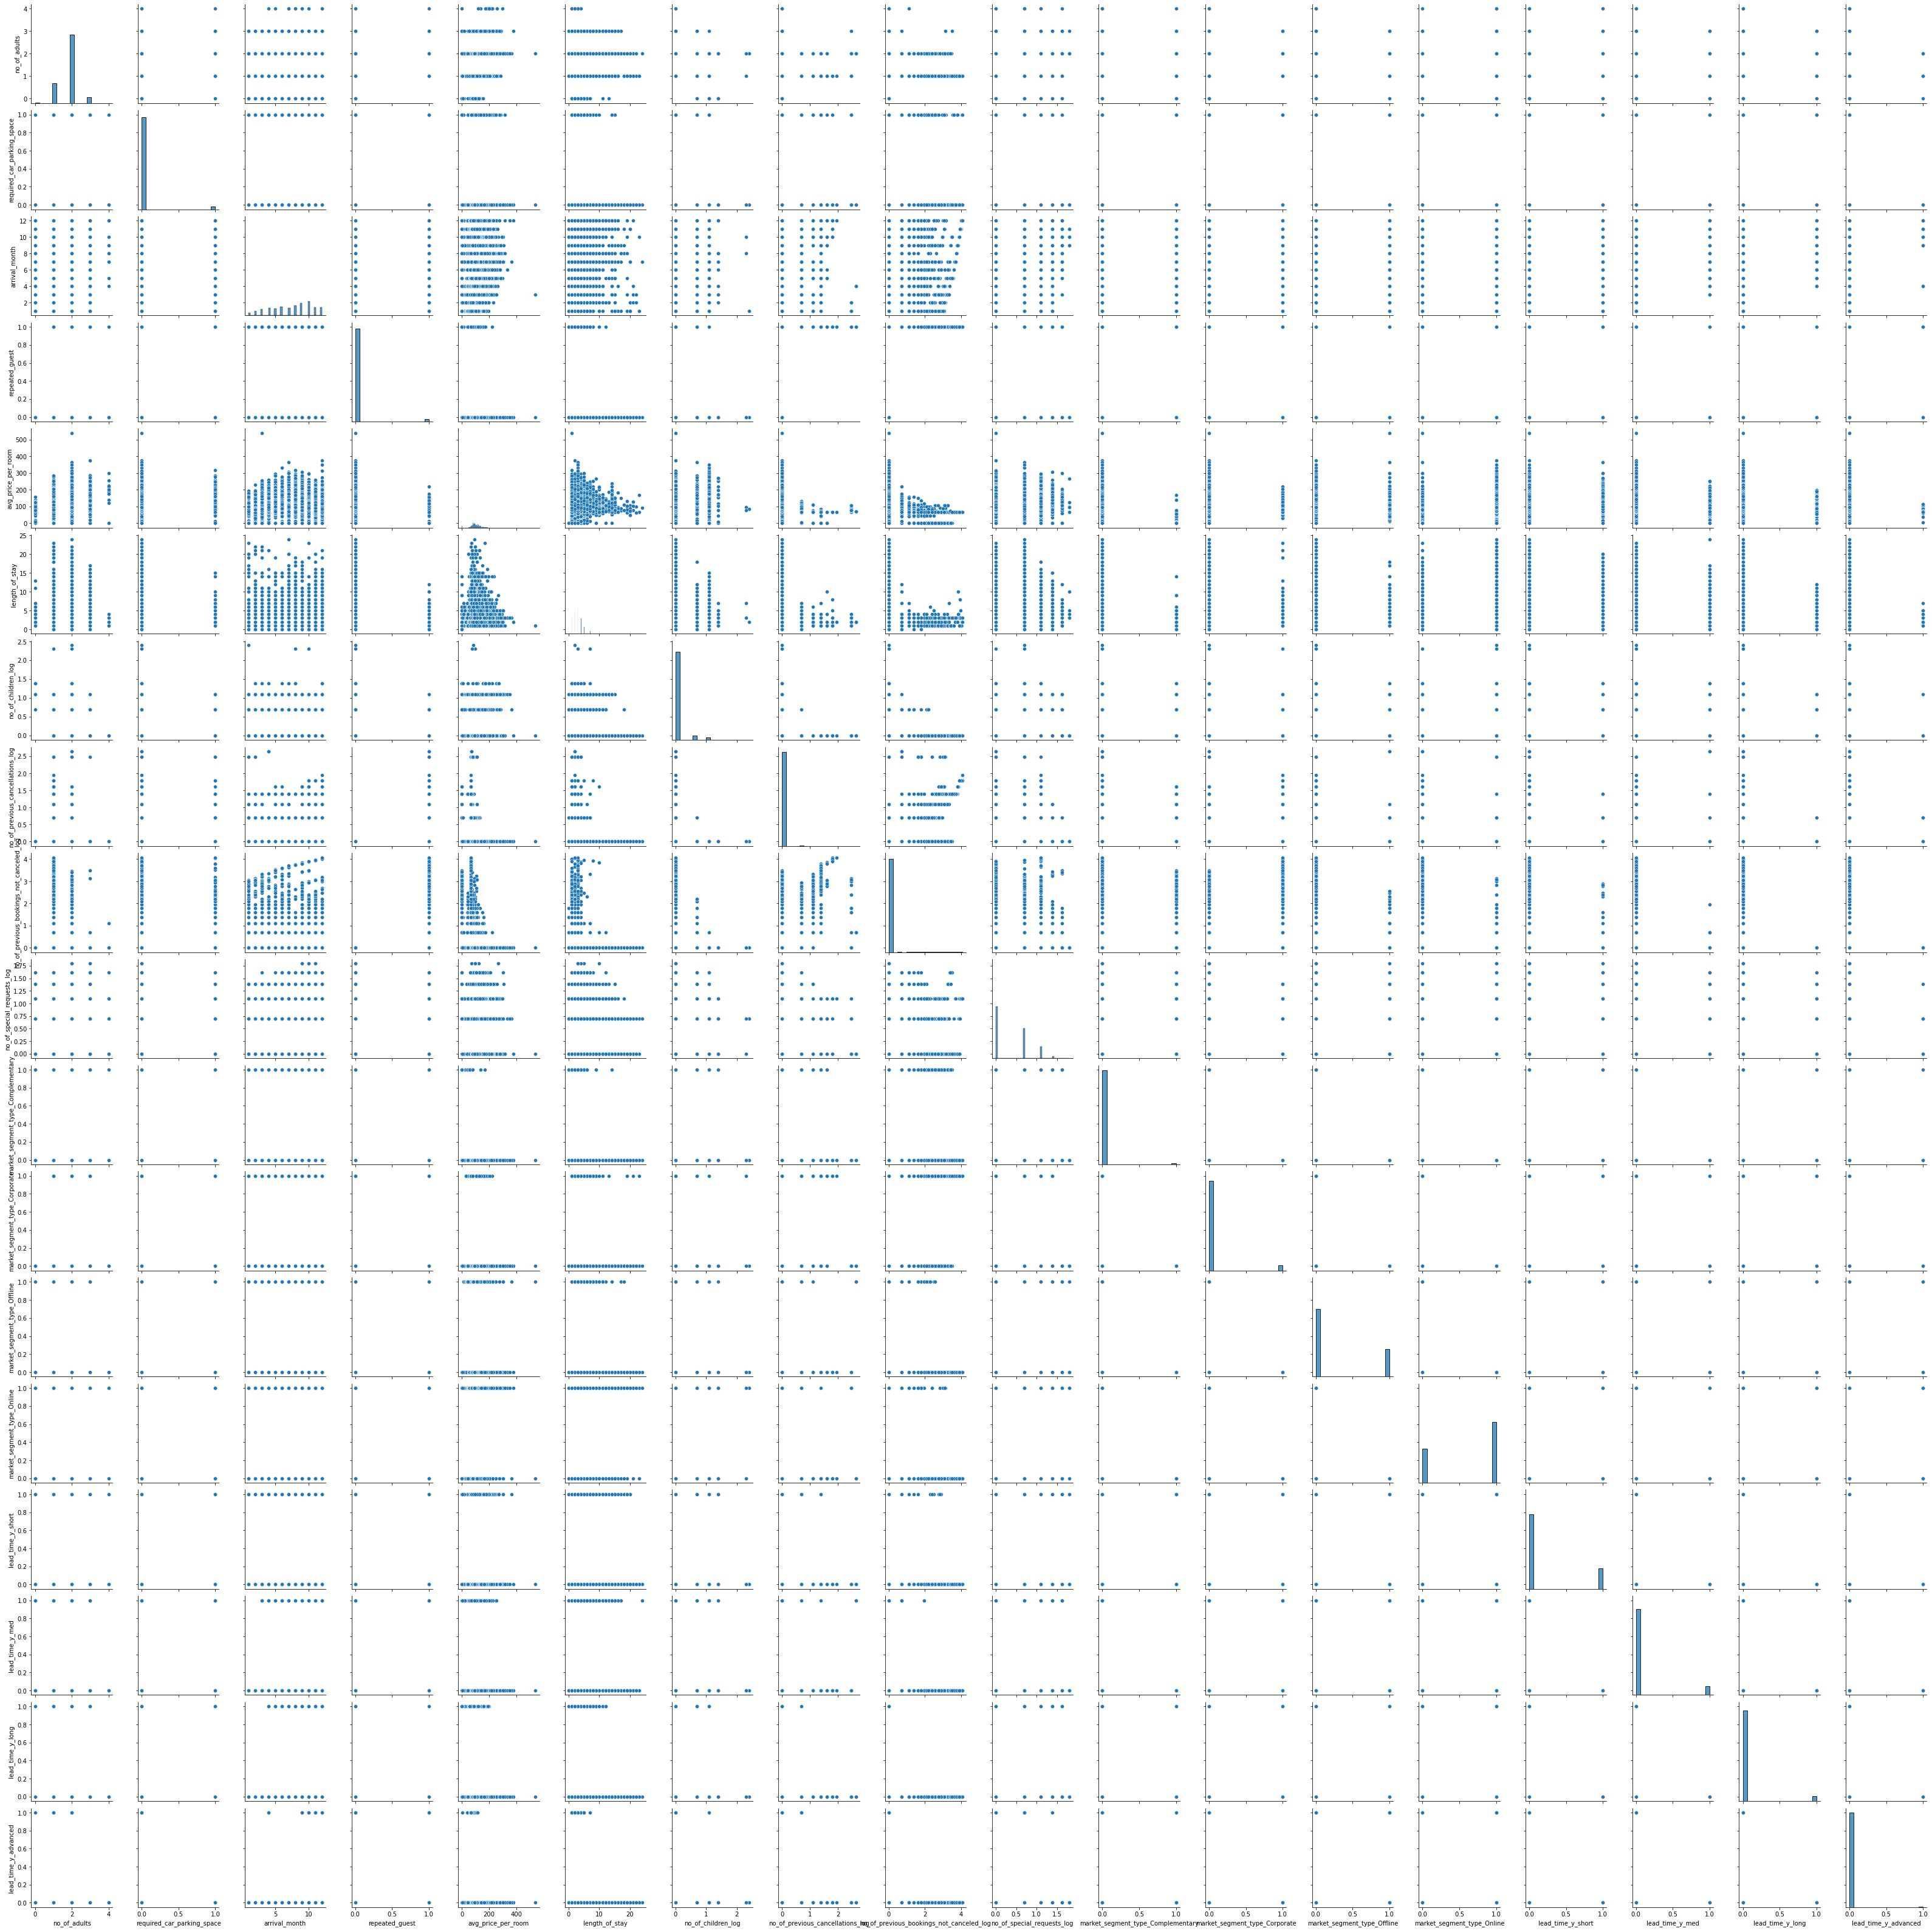

In [61]:
sns.pairplot(df4[['no_of_adults',
 'required_car_parking_space',
 'arrival_month',
 'repeated_guest',
 'avg_price_per_room',
 'length_of_stay',
 'no_of_children_log',
 'no_of_previous_cancellations_log',
 'no_of_previous_bookings_not_canceled_log',
 'no_of_special_requests_log',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online',
 'lead_time_y_short',
 'lead_time_y_med',
 'lead_time_y_long',
 'lead_time_y_advanced']]);

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

- One way to measure multicollinearity (high correlation) is the variance inflation factor (VIF), which assesses how much the variance of an estimated regression coefficient increases if your predictors are correlated. A VIF between 5 and 10 indicates high correlation that may be problematic.

In [62]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                       326.141919
no_of_adults                                  1.346659
no_of_week_nights                           100.277464
required_car_parking_space                    1.041578
arrival_month                                 1.051511
repeated_guest                                3.340040
avg_price_per_room                            1.936037
length_of_stay                              146.442538
no_of_children_log                            1.866322
no_of_weekend_nights_log                     34.428764
no_of_previous_cancellations_log              1.597137
no_of_previous_bookings_not_canceled_log      3.508907
no_of_special_requests_log                    1.267959
type_of_meal_plan_Meal Plan 2                 1.217525
type_of_meal_plan_Meal Plan 3                 1.025316
type_of_meal_plan_Not Selected                1.236534
room_type_reserved_Room_Type 2                1.090666
room_type_reserved_Room_Type 3                1.003

In [63]:
#Let's drop the number of weekend & week nights. we combine them into one. 
#We repeat this step with the market segments too. We do this because they all have large multi values
X_train1 = X_train.drop(['no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary'],
                       axis=1)

## Building a Logistic Regression model

In [64]:
logit = sm.Logit(y_train, X_train1.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463427
         Iterations 10


In [65]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.2687
Time:                        14:07:04   Log-Likelihood:                -11767.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6818      0.098    -37.650      0.000      -3.873      -3.490
no_of_adults                             

In [66]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                       29.389432
no_of_adults                                 1.279036
required_car_parking_space                   1.037343
arrival_month                                1.045906
repeated_guest                               3.216850
avg_price_per_room                           1.583496
length_of_stay                               1.076888
no_of_children_log                           1.855492
no_of_previous_cancellations_log             1.576794
no_of_previous_bookings_not_canceled_log     3.445330
no_of_special_requests_log                   1.133817
type_of_meal_plan_Meal Plan 2                1.134531
type_of_meal_plan_Meal Plan 3                1.018636
type_of_meal_plan_Not Selected               1.108819
room_type_reserved_Room_Type 2               1.079517
room_type_reserved_Room_Type 3               1.000877
room_type_reserved_Room_Type 4               1.317003
room_type_reserved_Room_Type 5               1.013508
room_type_rese

In [67]:
# test performance
pred_train = lg.predict(X_train1) > 0.5
pred_train = np.round(pred_train)

In [68]:
X_train2 = X_train1.drop(['room_type_reserved_Room_Type 3'], axis=1)
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     25392 non-null  float64
 1   no_of_adults                              25392 non-null  float64
 2   required_car_parking_space                25392 non-null  float64
 3   arrival_month                             25392 non-null  float64
 4   repeated_guest                            25392 non-null  float64
 5   avg_price_per_room                        25392 non-null  float64
 6   length_of_stay                            25392 non-null  float64
 7   no_of_children_log                        25392 non-null  float64
 8   no_of_previous_cancellations_log          25392 non-null  float64
 9   no_of_previous_bookings_not_canceled_log  25392 non-null  float64
 10  no_of_special_requests_log    

In [69]:
logit = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463428
         Iterations 10


In [70]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.2687
Time:                        14:07:47   Log-Likelihood:                -11767.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6818      0.098    -37.651      0.000      -3.873      -3.490
no_of_adults                             

In [71]:
X_train3 = X_train2.drop(['no_of_previous_bookings_not_canceled_log'], axis=1)

In [72]:
logit = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463479
         Iterations 9


In [73]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.2686
Time:                        14:07:57   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6853      0.098    -37.686      0.000      -3.877      -3.494
no_of_adults                         0.2328      0.035      6.633

In [74]:
# let's check the VIF of the predictors again to see whether any multicollinearity still persist
vif_series = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                               29.239515
no_of_adults                         1.276452
required_car_parking_space           1.036585
arrival_month                        1.044675
repeated_guest                       1.552463
avg_price_per_room                   1.578995
length_of_stay                       1.076638
no_of_children_log                   1.855384
no_of_previous_cancellations_log     1.426094
no_of_special_requests_log           1.128277
type_of_meal_plan_Meal Plan 2        1.134291
type_of_meal_plan_Meal Plan 3        1.018576
type_of_meal_plan_Not Selected       1.108682
room_type_reserved_Room_Type 2       1.079477
room_type_reserved_Room_Type 4       1.316395
room_type_reserved_Room_Type 5       1.012609
room_type_reserved_Room_Type 6       1.832724
room_type_reserved_Room_Type 7       1.071514
lead_time_y_short                    1.105261
lead_time_y_med                      1.091919
lead_time_y_long                     1.122907
lead_time_y_advanced

In [75]:
X_train4 = X_train3.drop(['room_type_reserved_Room_Type 2'], axis=1)

In [76]:
logit = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463500
         Iterations 9


In [77]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.2686
Time:                        14:08:23   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6755      0.097    -37.773      0.000      -3.866      -3.485
no_of_adults                         0.2313      0.035      6.592

In [78]:
X_train5 = X_train4.drop(['room_type_reserved_Room_Type 4'], axis=1)

In [79]:
logit = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463522
         Iterations 9


In [80]:
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.2686
Time:                        14:08:34   Log-Likelihood:                -11770.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.7035      0.094    -39.515      0.000      -3.887      -3.520
no_of_adults                         0.2398      0.034      7.023

## Model performance evaluation

In [81]:
# The code below converts coefficients to odds using numpy
odds = np.exp(lg5.params)

# We then add the odds to a dataframe
pd.DataFrame(odds, X_train5.columns, columns=["odds"]).T

,const,no_of_adults,required_car_parking_space,arrival_month,repeated_guest,avg_price_per_room,length_of_stay,no_of_children_log,no_of_previous_cancellations_log,no_of_special_requests_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,lead_time_y_short,lead_time_y_med,lead_time_y_long,lead_time_y_advanced
odds,0.024636,1.271005,0.234579,0.935032,0.051575,1.023344,1.116331,1.749625,2.60091,0.147237,0.697598,5.631328,2.301302,0.387484,0.329734,0.156016,3.727461,17.514826,21.105724,98.170565


In [82]:
# We then find the percentage change
perc_change_odds = (np.exp(lg5.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train3.columns, columns=["change_odds%"]).T

,const,no_of_adults,required_car_parking_space,arrival_month,repeated_guest,avg_price_per_room,length_of_stay,no_of_children_log,no_of_previous_cancellations_log,no_of_special_requests_log,...,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,lead_time_y_short,lead_time_y_med,lead_time_y_long,lead_time_y_advanced
change_odds%,-97.53635,27.100515,-76.542091,-6.496819,-94.842473,2.33444,11.6331,74.962538,160.091028,-85.276282,...,130.13023,NaN,NaN,-61.251587,-67.026611,-84.398434,272.74612,1651.48264,2010.57241,9717.0565


In [83]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train5.astype(float))
lg3 = logit.fit()

pred_train4 = lg5.predict(X_train5)
pred_train4 = np.round(pred_train4)

Optimization terminated successfully.
         Current function value: 0.463522
         Iterations 9


## Final Model Summary

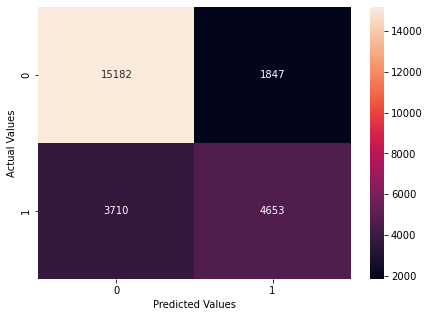

In [84]:
# Let's use a confusion matrix
cm = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [85]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Accuracy on training set :  0.7811515437933207


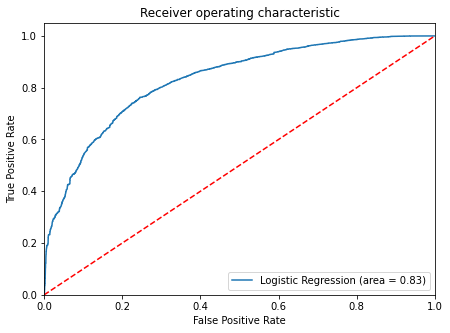

In [86]:
logit_roc_auc_train = roc_auc_score(y_train, lg5.predict(X_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [87]:
# Let's drop the variables from test set as well the variables which are dropped from training set
X_test1 = X_test.drop([ 'no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary',
                       'room_type_reserved_Room_Type 3',
                       'room_type_reserved_Room_Type 4',
                       'no_of_previous_bookings_not_canceled_log',
                       'room_type_reserved_Room_Type 2'
                      
                     ], axis=1)

In [88]:
pred_test = lg5.predict(X_test1) > 0.5
pred_test = np.round(pred_test)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.7811515437933207
Accuracy on test set :  0.7846182118901038


## Building a Decision Tree model

In [89]:
# Lets fit a decision tree model using the gini critera
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [90]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):

    # checking the probabilities that are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # let's round off the above values
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute the Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute the F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# create a function to evaluate models using model_performance_classification_statsmodel & confusion_matrix_statsmodels
def performance_Matrix(
    Model_type,
    Model,
    X_training_data,
    y_training_data,
    X_testing_data,
    y_testing_data,
    threshold=0.5,
):
    """
    Model_type = Model Label using string format
    Model = Fitted Model that you want to pass the data through
    X_train_data = X Training Data
    y_train_data = Y Training Data
    X_testing_data= X Testing Data
    y_testing_data = Y Testing Data    
    """

    print(f"Training Performance for model type {Model_type}:")
    print(
        model_performance_classification_statsmodels(
            Model, X_training_data, y_training_data, threshold=threshold
        )
    )
    print("*" * 50)
    print(f"Test Perfromancefor model type {Model_type}")
    print(
        model_performance_classification_statsmodels(
            Model, X_testing_data, y_test, threshold=threshold
        )
    )
    print("*" * 50)
    print("*" * 50)
    print("Confusion Matrix for training & testing")
    confusion_matrix_statsmodels(
        Model, X_training_data, y_training_data, threshold=threshold
    )
    print("*" * 50)
    confusion_matrix_statsmodels(
        Model, X_testing_data, y_testing_data, threshold=threshold
    )

Training Performance for model type Gini:
   Accuracy    Recall  Precision        F1
0  0.975465  0.944398   0.980387  0.962056
**************************************************
Test Perfromancefor model type Gini
   Accuracy    Recall  Precision        F1
0  0.851787  0.763203    0.77531  0.769209
**************************************************
**************************************************
Confusion Matrix for training & testing
**************************************************


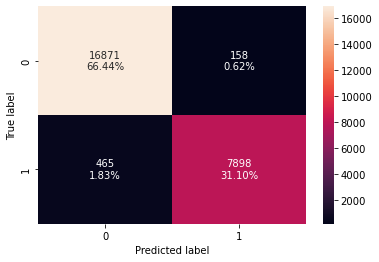

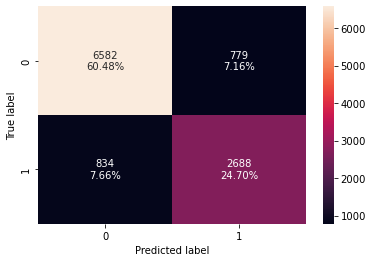

In [91]:
performance_Matrix("Gini", model, X_train, y_train, X_test, y_test)

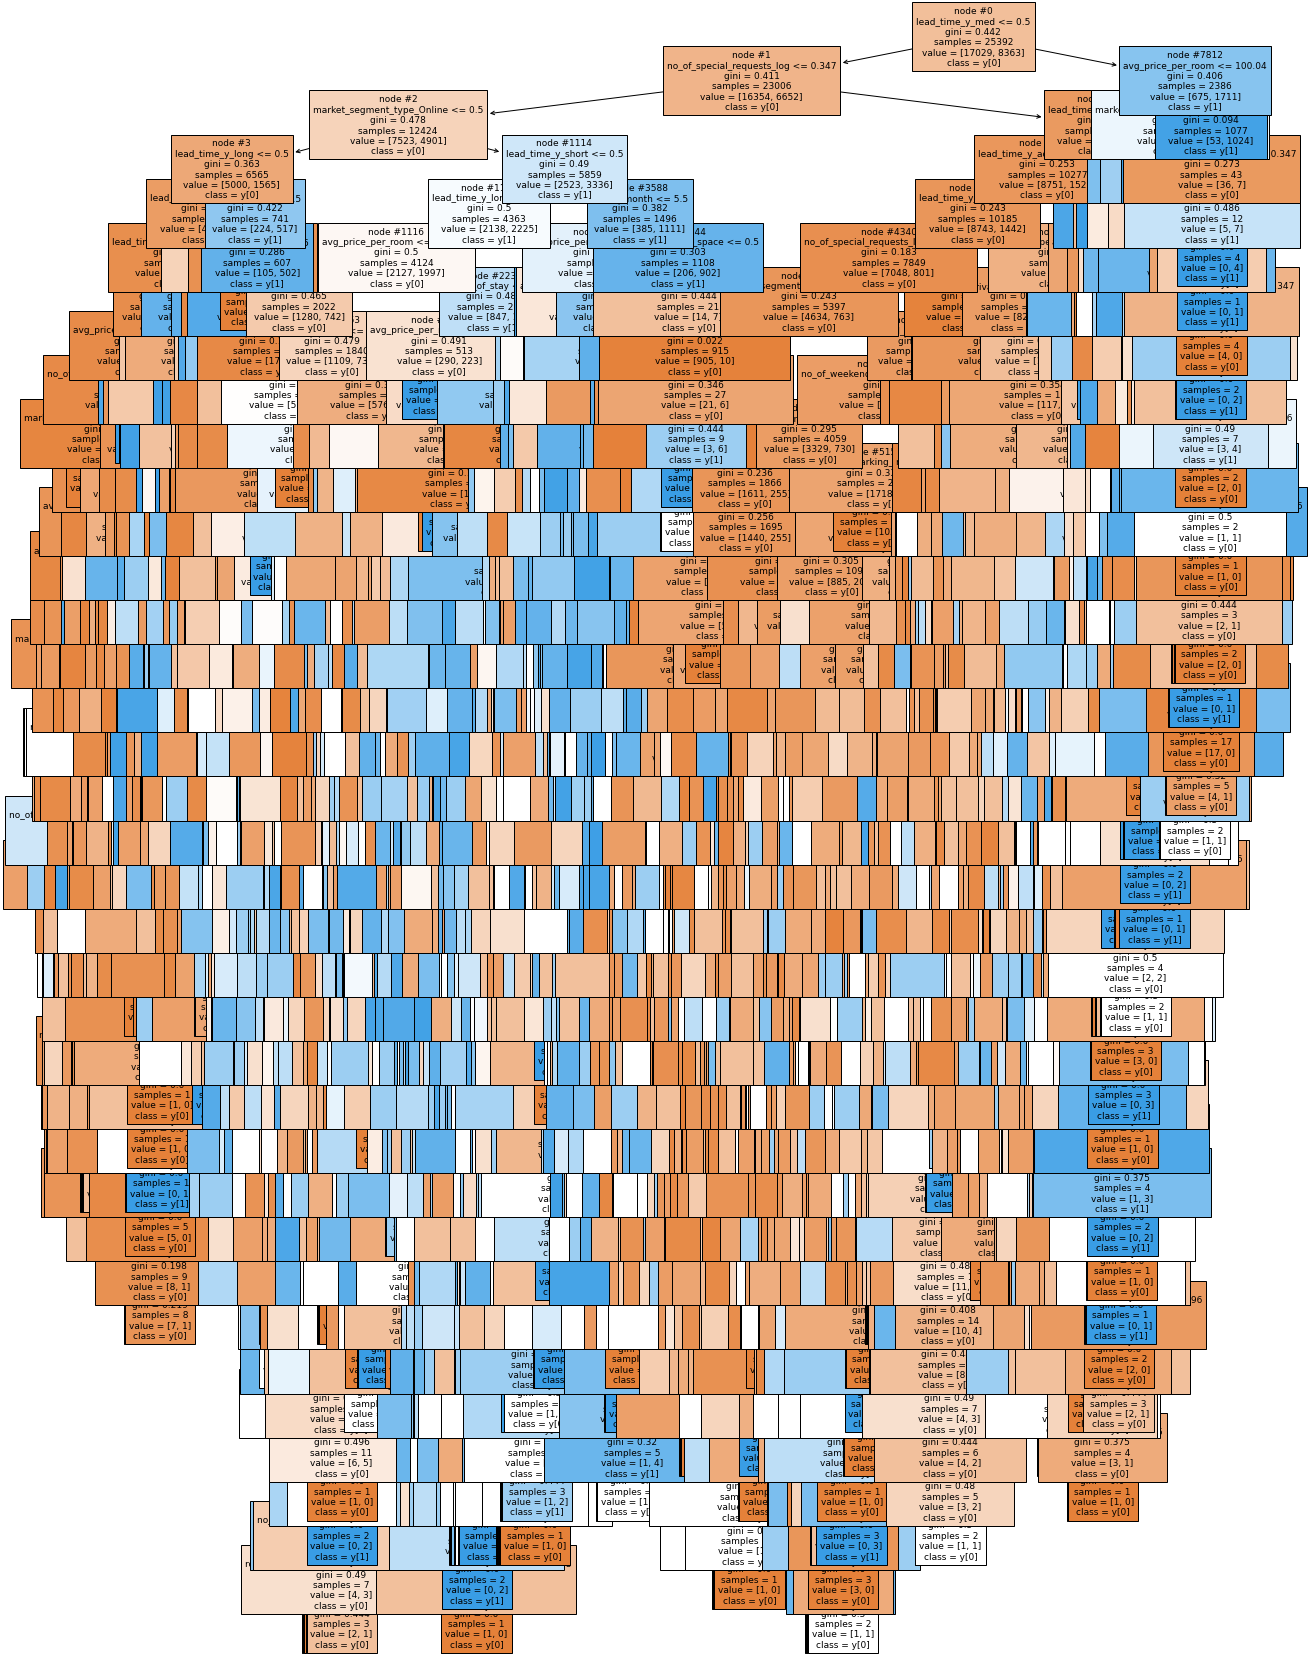

In [92]:
column_names = list(X.columns)
feature_names = column_names

plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

The decision tree branchs are very complex. This is probably due to overfitting of the model. To overcome this problem, we will look at limiting the depth and post pruning.

## Do we need to prune the tree?

Yes. We should look at limiting depth and pruning the tree.

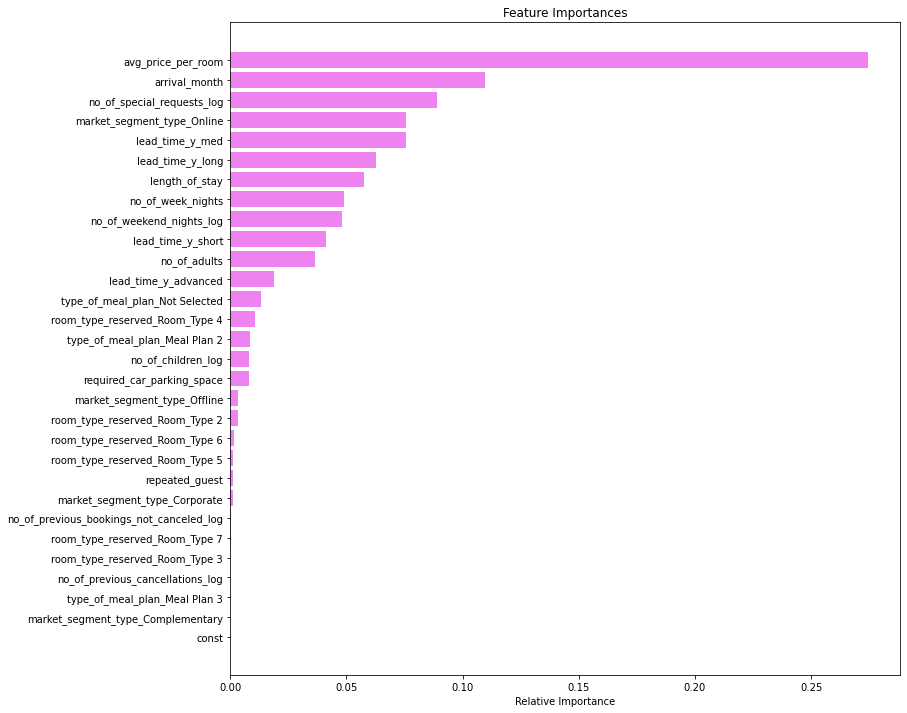

In [93]:
# Gother the model's important variables and sort by importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot importance variables
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Insight: The average price per room, the lead time, the arrival month, online booking, and number of special request have a high level of importance when determining if a guest will cancel.

## Decision Tree with Hyperparameter tuning
- Let's use GridSearch to hyperparameter tune the model

In [94]:
# We will choose the DecisionTreeClassifier as our type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Let's choose some grid of parameters to use

parameters = {
    "max_depth": [5, 10, 15],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001],
}

# Type of scoring used to compare parameter combinations
# Based on business needs, we'll use F1_score as the metric
acc_scorer = make_scorer(f1_score)

# Let's use the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fitting the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_impurity_decrease=1e-05,
                       random_state=1)

The estimator has a given some new parameters to run:
    max_depth=15, min_impurity_decrease=1e-05,
                       random_state=1

Training Performance for model type Entropy:
   Accuracy    Recall  Precision        F1
0   0.89158  0.781299   0.876106  0.825991
**************************************************
Test Perfromancefor model type Entropy
   Accuracy    Recall  Precision       F1
0  0.859781  0.731119   0.816424  0.77142
**************************************************
**************************************************
Confusion Matrix for training & testing
**************************************************


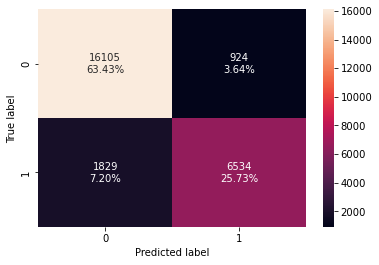

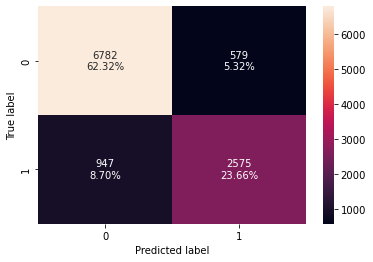

In [95]:
# let's run the estimator in our performance matrix
performance_Matrix("Entropy", estimator, X_train, y_train, X_test, y_test)

By reduce the number of branches, we can better generalize the testing data which allowed for a higher f1 score.

In [96]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

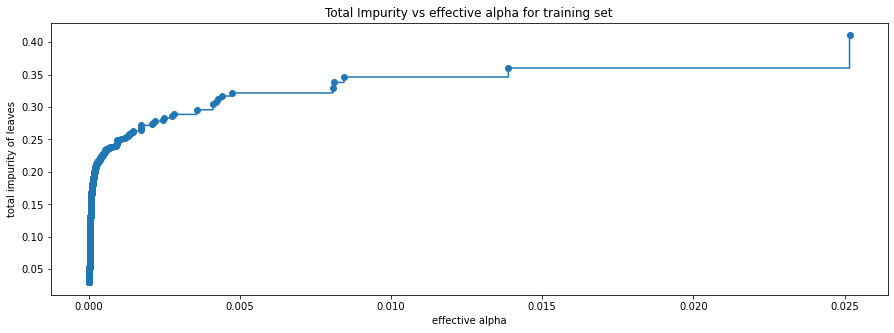

In [97]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [98]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03118527620395911


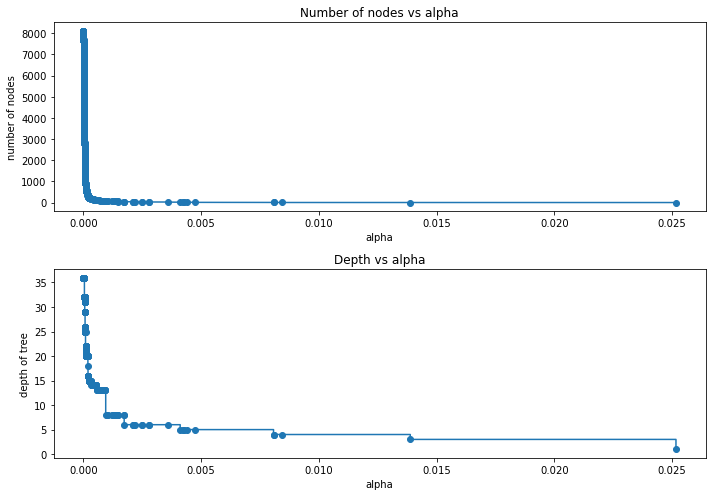

In [99]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [100]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [101]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

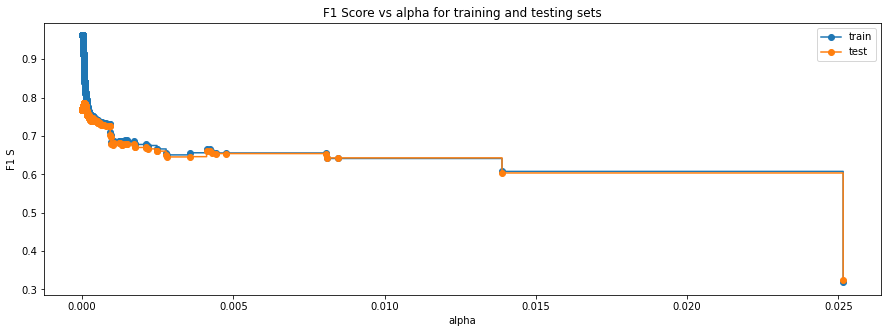

In [102]:
# Plot F1_score & Alpha points to visualize the optimal alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 S")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
# let's create the model to get highest train and test f1_score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=7.055105254566101e-05, random_state=1)


Training Performance for model type Gini:
   Accuracy    Recall  Precision        F1
0  0.903946  0.819084   0.880916  0.848875
**************************************************
Test Perfromancefor model type Gini
   Accuracy    Recall  Precision        F1
0  0.865294  0.762067   0.810386  0.785484
**************************************************
**************************************************
Confusion Matrix for training & testing
**************************************************


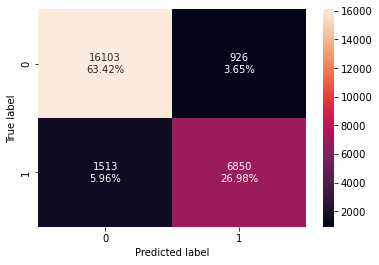

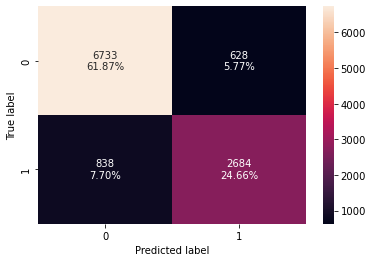

In [104]:
performance_Matrix("Gini", best_model, X_train, y_train, X_test, y_test)

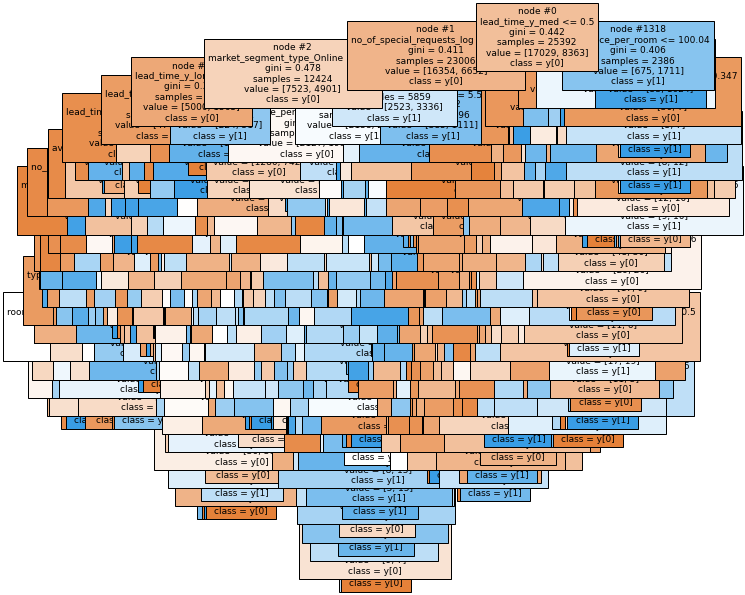

In [105]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

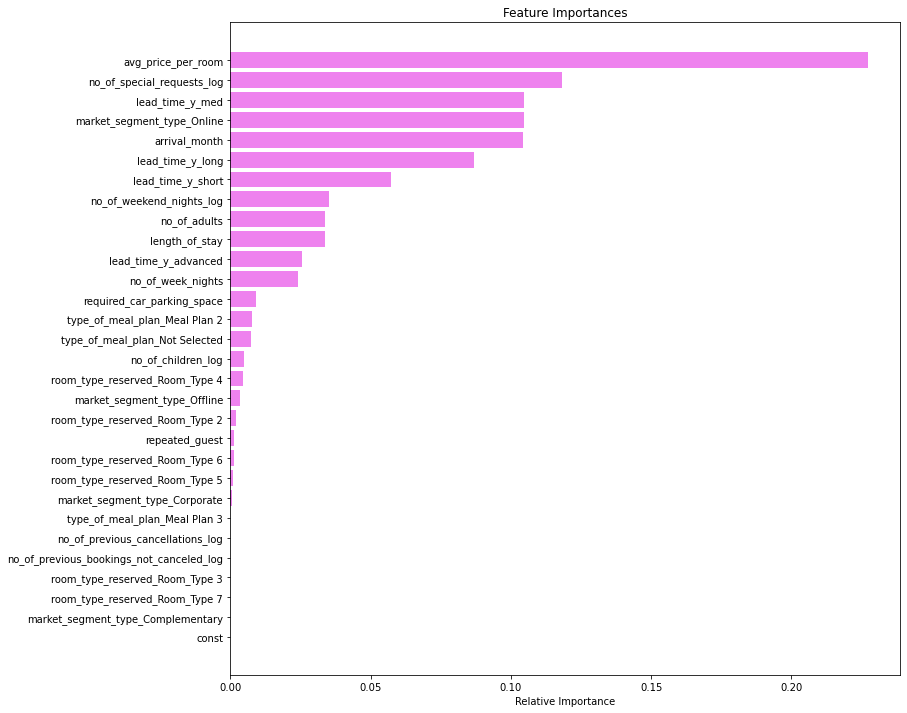

In [106]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Like the original model, the same features are relatively important but there's a slight change in order. The number of special requests has overtaken the arrival month. 
- The number of special requests, the average price per room, and lead times play a big factor in whether a person will cancel their booking. 

## Model Performance Comparison and Conclusions

In [107]:
decision_tree_perf_train = model_performance_classification_statsmodels(
    model, X_train, y_train
)

decision_tree_tune_perf_train = model_performance_classification_statsmodels(
    estimator, X_train, y_train
)

decision_tree_postpruned_perf_train = model_performance_classification_statsmodels(
    best_model, X_train, y_train
)

# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.975465,0.891580,0.903946
Recall,0.944398,0.781299,0.819084
Precision,0.980387,0.876106,0.880916
F1,0.962056,0.825991,0.848875


In [108]:
decision_tree_perf_test = model_performance_classification_statsmodels(
    model, X_test, y_test
)

decision_tree_tune_perf_test = model_performance_classification_statsmodels(
    estimator, X_test, y_test
)

decision_tree_postpruned_perf_test = model_performance_classification_statsmodels(
    best_model, X_test, y_test
)

# training performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.851787,0.859781,0.865294
Recall,0.763203,0.731119,0.762067
Precision,0.775310,0.816424,0.810386
F1,0.769209,0.771420,0.785484


Insight: The Decision Trees' post-pruning model has the highest Accuracy and F1 score for testing data. This model would be ideal for performing future predictions.

## Actionable Insights

- The three most important variables as far as cancellations is concerned were the lead time (how far in advance they booked the room(s)), special request for the stay, and average price of the room.
- Guests who made a special request were very unlikely to cancel their bookings.

## Recommendations for the hotel
1. Knowing that lead time, price, and online bookings have the highest influence on cancellations we can infer that having a cancellation clause during the online booking process would influence how customer's book.
2. Keep price of rooms near competitive pricing as it seems like guest will book a room with the expectation of continued searches.
3. Since `repeating_guests` have a very low cancellation rate, creating a loyalty program for those guest would help incentives other to move into that category.
4. During the online booking process, offering addtional customizations or special request would help reduce the likelihood of a cancelled booking.